In [1]:
import source.utilities as util
import source.loader as load
import source.analyzer as analyzer

In [2]:
analyzer.analyzeChecking(6, 2024)

The file './input/checking/wf/6_2024.csv' does not exist.


c:\Users\doomo\Code\personal-finance-project\source\loader.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


DateParseError: Unknown datetime string format, unable to parse: Beginning balance as of 05/31/2024, at position 0

Total Expense: 1567.9
Expense: category
DINING            48.91
ENTERTAINMENT     15.00
HEALTH CARE      802.83
OTHER            221.48
SERVICE            0.03
SHOPPING         266.83
SUBSCRIPTION     187.82
UTILITIES         25.00
Name: transaction, dtype: float64
Category: category
DINING            3.12%
ENTERTAINMENT     0.96%
HEALTH CARE       51.2%
OTHER            14.13%
SERVICE            0.0%
SHOPPING         17.02%
SUBSCRIPTION     11.98%
UTILITIES         1.59%
Name: transaction, dtype: object


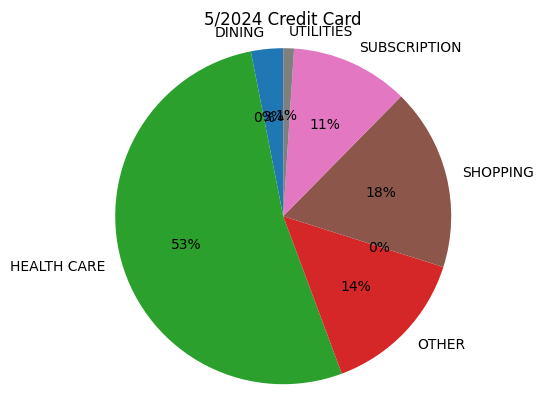

In [ ]:
analyzer.analyzeCreditCard(6, 2024)

Expense: category
DINING          -33.72
HEALTH CARE    -802.83
OTHER          -217.15
SHOPPING         -3.65
SUBSCRIPTION     -2.99
UTILITIES       -25.00
Name: transaction, dtype: float64


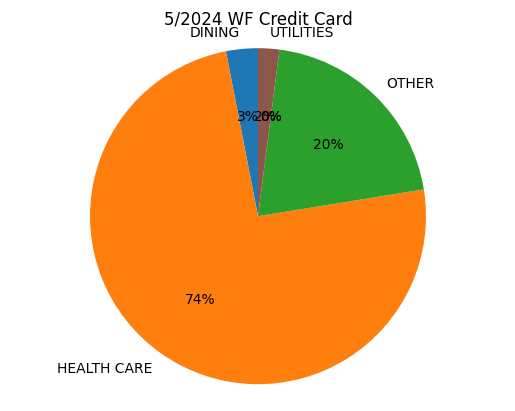

In [ ]:
# Import Wells Fargo
wfDf = load.importWF('./input/credit/wf/6_2024.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '5/2024 WF Credit Card')